# PÓS-GRADUAÇÃO LATO SENSU ESPECIALIZAÇÃO EM MINERAÇÃO DE DADOS EDUCACIONAIS

* Disciplina: Visualização de Dados
* Professor: Dr. Richard Godinez Tello
* Semestre: 2025/1
* Aluno: Sandro Ricardo De Souza


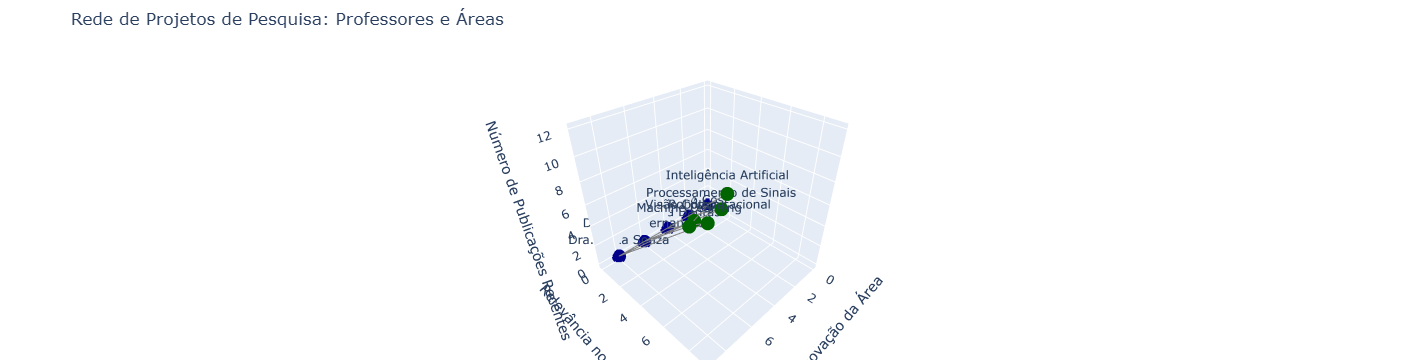

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 30 18:56:20 2025

@author: srsouza
"""

import plotly.graph_objects as go
import networkx as nx

# Dados: Professores, suas áreas de pesquisa e os projetos desenvolvidos
# Cada projeto está associado a um professor e suas respectivas áreas.

professores = ['Dr. Ana Silva', 'Dr. Bruno Costa', 'Dra. Clara Dantas', 'Dr. Diego Fernandes', 'Dra. Erika Souza']
areas_pesquisa = ['Inteligência Artificial', 'Processamento de Sinais', 'Machine Learning', 'Visão Computacional', 'Robótica']

# Relações: Projetos de pesquisa conectando professores e áreas
# (professor, área de pesquisa)
projetos = [
    ('Dr. Ana Silva', 'Inteligência Artificial'),
    ('Dr. Ana Silva', 'Machine Learning'),
    ('Dr. Bruno Costa', 'Processamento de Sinais'),
    ('Dr. Bruno Costa', 'Robótica'),
    ('Dra. Clara Dantas', 'Inteligência Artificial'),
    ('Dra. Clara Dantas', 'Visão Computacional'),
    ('Dr. Diego Fernandes', 'Machine Learning'),
    ('Dr. Diego Fernandes', 'Processamento de Sinais'),
    ('Dra. Erika Souza', 'Robótica'),
    ('Dra. Erika Souza', 'Visão Computacional'),
    ('Dra. Erika Souza', 'Inteligência Artificial')
]

# Criar grafo bipartido
G = nx.Graph()
G.add_nodes_from(professores, bipartite=0)
G.add_nodes_from(areas_pesquisa, bipartite=1)
G.add_edges_from(projetos)

# Definindo variáveis para as áreas de pesquisa
# (eixo X: Inovação da Área, eixo Y: Relevância no Mercado, eixo Z: Número de Publicações Recentes)
area_dados = {
    'Inteligência Artificial': [8, 9, 12],
    'Processamento de Sinais': [5, 6, 7],
    'Machine Learning': [9, 8, 10],
    'Visão Computacional': [7, 7, 8],
    'Robótica': [6, 5, 6]
}

# Posicionamento dos nós
pos = {}

# Professores: organizados no plano z = 0, com X e Y distribuídos linearmente
for i, prof in enumerate(professores):
    pos[prof] = [i * 2, 0, 0] # Distribuindo-os ao longo do eixo X

# Áreas de pesquisa: posicionadas de acordo com as variáveis definidas
for area, dados in area_dados.items():
    complexidade, carga_horaria, semestre = dados # Reutilizando as variáveis para clareza
    pos[area] = [complexidade, carga_horaria, semestre]

# Coordenadas das arestas
edge_x, edge_y, edge_z = [], [], []
for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='gray', width=2),
    hoverinfo='none'
)

# Nós dos professores
prof_x = [pos[p][0] for p in professores]
prof_y = [pos[p][1] for p in professores]
prof_z = [pos[p][2] for p in professores]

prof_trace = go.Scatter3d(
    x=prof_x,
    y=prof_y,
    z=prof_z,
    mode='markers+text',
    marker=dict(size=8, color='darkblue'),
    text=professores,
    textposition="top center"
)

# Nós das áreas de pesquisa
area_x = [pos[a][0] for a in areas_pesquisa]
area_y = [pos[a][1] for a in areas_pesquisa]
area_z = [pos[a][2] for a in areas_pesquisa]

area_trace = go.Scatter3d(
    x=area_x,
    y=area_y,
    z=area_z,
    mode='markers+text',
    marker=dict(size=8, color='darkgreen'),
    text=areas_pesquisa,
    textposition="top center"
)

# Montar a figura
fig = go.Figure(data=[edge_trace, prof_trace, area_trace],
                layout=go.Layout(
                    title='Rede de Projetos de Pesquisa: Professores e Áreas',
                    showlegend=False,
                    margin=dict(l=0, r=0, b=0, t=50),
                    scene=dict(
                        xaxis=dict(title='Nível de Inovação da Área', showbackground=True),
                        yaxis=dict(title='Relevância no Mercado', showbackground=True),
                        zaxis=dict(title='Número de Publicações Recentes', showbackground=True),
                        aspectmode='cube'
                    )
                ))

fig.show()

# Exportar como html
fig.write_html("grafo_3d_professores_areas_pesquisa.html")

## Análise

A análise da estrutura do grafo de projetos de pesquisa entre professores e áreas revela alguns aspectos importantes.

Observa-se que a professora como "Dra. Erika Souza" apresenta múltiplas conexões com diferentes áreas de pesquisa, indicando uma atuação interdisciplinar ou um envolvimento em projetos que abrangem diversos domínios. Em contrapartida, outros professores podem ter um foco mais direcionado a uma ou duas áreas específicas.

Quanto aos agrupamentos, percebe-se que as áreas de "Inteligência Artificial" tende a agrupar mais professores, sugerindo que esta é uma área de grande interesse e atividade na pesquisa. Isso pode ser inferido pela quantidade de arestas (projetos) que se conectam a esses nós de área.

Em relação aos padrões, a distribuição dos nós das áreas de pesquisa no espaço tridimensional permite identificar tendências. Áreas com altos valores para "Nível de Inovação da Área", "Relevância no Mercado" e "Número de Publicações Recentes" se posicionam mais distantes da origem, indicando maior dinamismo e produtividade. Por exemplo, "Inteligência Artificial" e "Machine Learning" estão mais afastadas, enquanto "Robótica" e "Processamento de Sinais" podem se agrupar mais próximas, dependendo de seus valores nessas dimensões. Essa visualização em 3D, portanto, permite identificar as áreas de pesquisa que são mais ativas e relevantes em múltiplas perspectivas.